In [2]:
import pandas as pd

## Methods

### Prophet
[Prophet](https://doi.org/10.7287/peerj.preprints.3190v2) is an open-source Python and R library for time-series data forecasting developed by Facebook. The library decomposed time-series data into three main model components, trend, seasonality, and holidays.

    $$ y(t) = g(t) + s(t) + h(t) + \epsilon_t $$

Where $g(t)$ is the trend function, $s(t)$ represents seasonality, and $h(t)$ represents the effects of holidays. The error term $\epsilon_t$ represents the idiosyncratic changes that the model can not accommodate.



### NeuralProphet
[NeuralPropht](https://doi.org/10.48550/arXiv.2111.15397), inspired by the Facebook Prophet, implemented a hybrid model to fuse the classic time series components by the Prophet package with neural network modules ([AR-Net](https://doi.org/10.48550/arXiv.1911.12436)) to enable the capability of fitting non-linear dynamics. The model is composed of six main component modules.

$$ \hat{y}_t = T(t) + S(t) + E(t) + F(t) + A(t) + L(t) $$

where $T(t)$ is the trend at time $t$,  $S(t)$ is seasonal effects,  $E(t)$ is event and holiday effects,  $F(t)$ is regression effects for future-known variables at time $t$,  $A(t)$ is auto-regression effects at time $t$ based on past observations. $L(t)$ is regression effects for lagged observations of exogenous variables at time $t$.


### Metrics
MAPE

## Results

In [12]:
mape_p = pd.read_csv("checkpoints/test_prophet_mape.csv", index_col=0)
mape_np = pd.read_csv("checkpoints/test_mape_zones.csv", index_col=0)
mape = pd.merge(mape_p, mape_np, on="zone")[["zone", "mape_test", "mape"]]
mape.columns = ["zone", "mape_p", "mape_np"]
mape = mape.set_index("zone")
mape

,mape_p,mape_np
zone,,
AEP,0.073588,0.022423
BC,0.103926,0.027855
DEOK,0.088954,0.061451
DOM,0.094767,0.020656
DUQ,0.079736,0.023907
JC,0.121864,0.036975
ME,0.080142,0.030330
PL,0.073560,0.052319
PN,0.058618,0.020288


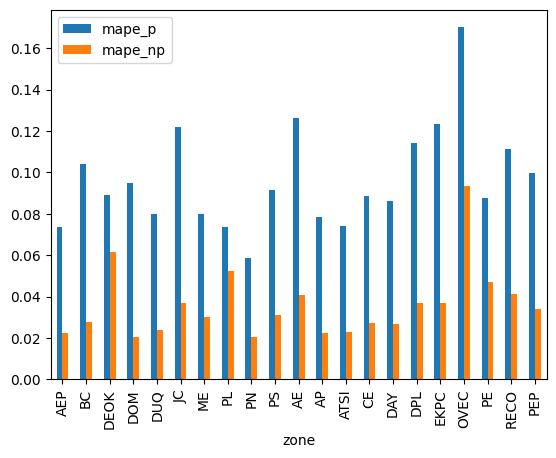

In [31]:
ax = mape.plot.bar()

Here, the MAPE values are calculated at the test timepoints based on the forcasting results from the trained Prophet and NeuralProphet models. The results show the NeuralProphet performed significantly better than Prophet model.

### Todo: learning curves, forcasting future

## Reference
Prophet: https://doi.org/10.7287/peerj.preprints
NeuralPropht: https://doi.org/10.48550/arXiv.2111.15397
AR-Net: https://doi.org/10.48550/arXiv.1911.12436